In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("mtsamples.csv")

In [3]:
data.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [4]:
data.head(5)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [6]:
data.describe()

,description,medical_specialty,sample_name,transcription,keywords
count,4999,4999,4999,4966,3931
unique,2348,40,2377,2357,3849
top,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,12,1103,5,5,81


In [7]:
data = data[['transcription', 'medical_specialty']]

print(len(data[data['transcription'].isna()]))
print("Before droping na values", data.shape)
data = data.drop(data[data['transcription'].isna()].index)
print("After droping na values", data.shape)

33
Before droping na values (4999, 2)
After droping na values (4966, 2)


In [8]:
categories = data.groupby(data['medical_specialty'])
for name, value in categories:
    print(name, len(value))

 Allergy / Immunology 7
 Autopsy 8
 Bariatrics 18
 Cardiovascular / Pulmonary 371
 Chiropractic 14
 Consult - History and Phy. 516
 Cosmetic / Plastic Surgery 27
 Dentistry 27
 Dermatology 29
 Diets and Nutritions 10
 Discharge Summary 108
 ENT - Otolaryngology 96
 Emergency Room Reports 75
 Endocrinology 19
 Gastroenterology 224
 General Medicine 259
 Hematology - Oncology 90
 Hospice - Palliative Care 6
 IME-QME-Work Comp etc. 16
 Lab Medicine - Pathology 8
 Letters 23
 Nephrology 81
 Neurology 223
 Neurosurgery 94
 Obstetrics / Gynecology 155
 Office Notes 50
 Ophthalmology 83
 Orthopedic 355
 Pain Management 61
 Pediatrics - Neonatal 70
 Physical Medicine - Rehab 21
 Podiatry 47
 Psychiatry / Psychology 53
 Radiology 273
 Rheumatology 10
 SOAP / Chart / Progress Notes 166
 Sleep Medicine 20
 Speech - Language 9
 Surgery 1088
 Urology 156


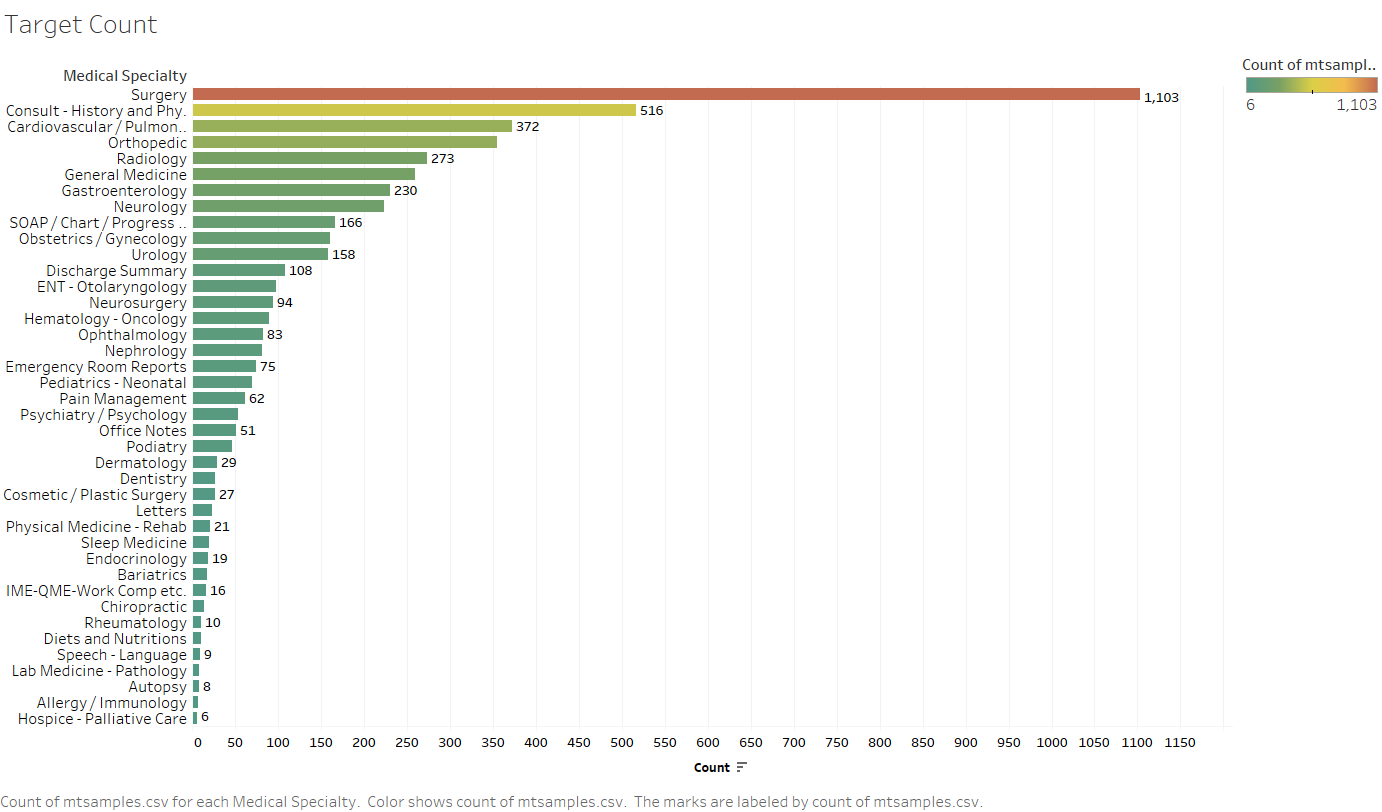

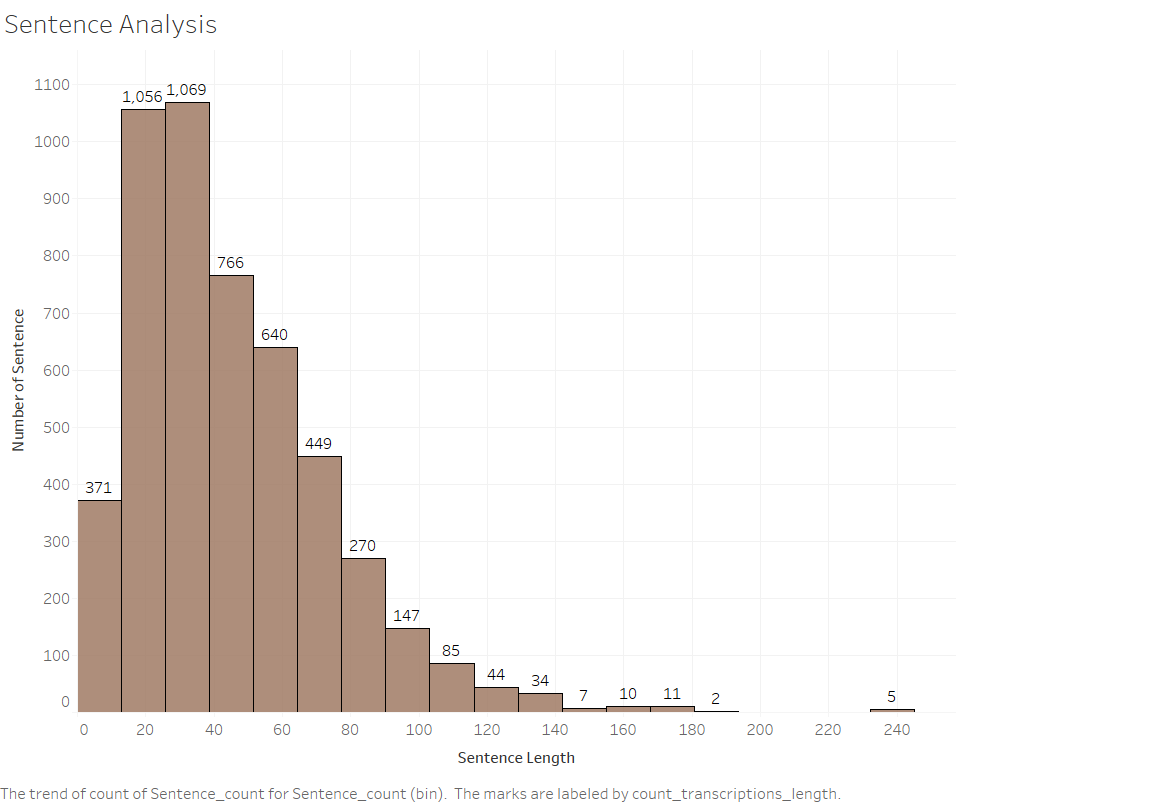

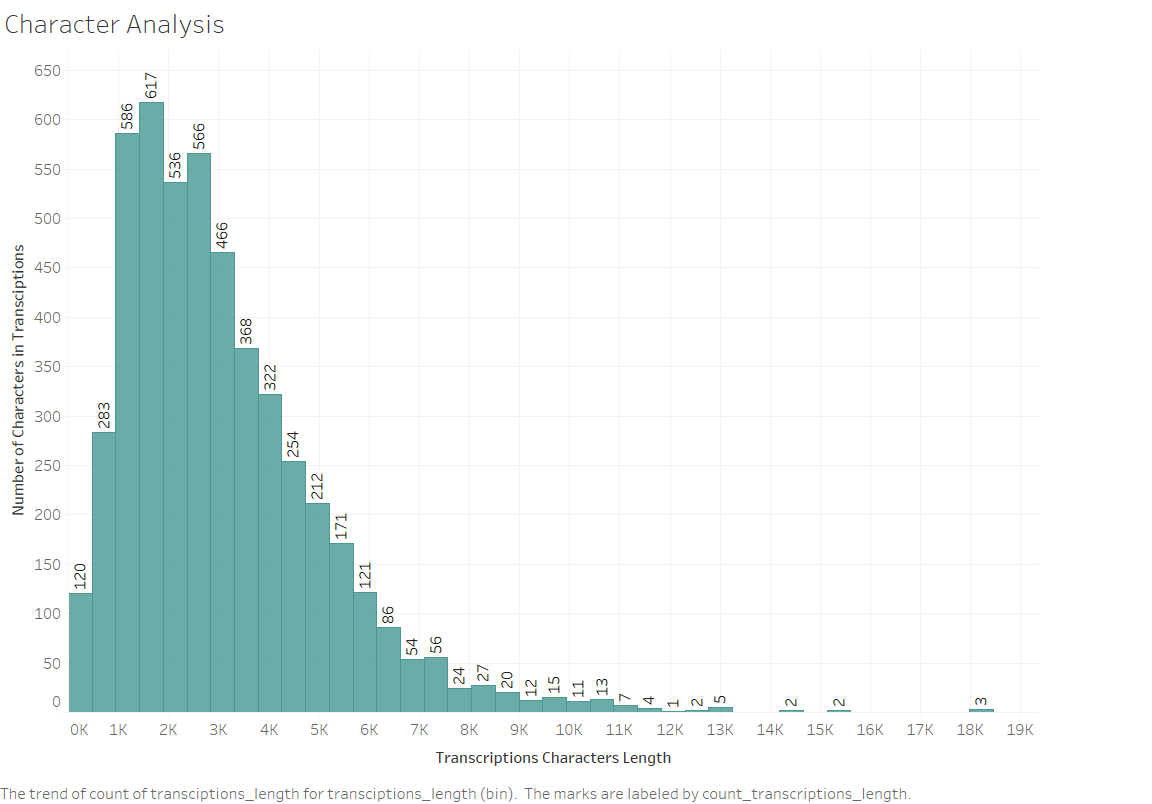

As Some Categories are less then 50 samples, they can be elemenated to improve the accuracy of the model for other classes

In [9]:
# minority_cat = list()
# for name, value in categories:
#     if len(value)<50:
#         minority_cat.append(name)
# print(minority_cat)

# data = data.drop(data[data['medical_specialty'].isin(minority_cat)].index)
# print(data[data['medical_specialty'].isin(minority_cat)].shape)

In [10]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz

  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.4.0-py3-none-any.whl size=125679338 sha256=fd584bc898dced5bf1dd8c61f91569517b87c1bbdfae2384fe5b3d9dfc57d1d0
  Stored in directory: c:\users\yoges\appdata\local\pip\cache\wheels\14\df\b7\7c9fcdc6696e8a2774b70e4729f18403285604c98718c584ec
Successfully built en-ner-bionlp13cg-md
  Attempting uninstall: typer
    Found existing installation: typer 0.4.0
    Uninstalling typer-0.4.0:
      Successfully uninstalled typer-0.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.1
    Uninstalling spacy-3.2.1:
      Successfully uninstalled spacy-3.2.1
  Attempting uninstall: en-ner-bionlp13cg-md
    Found existing installation: en-ner-bionlp13cg-md 0.2.5
    Uninstalling en-ner-bionlp13cg-md-0.2.5:
      Successfully uninstalled en-ner-bionlp13cg-md-0.2.5


In [11]:
import spacy
import en_ner_bionlp13cg_md
nlp = en_ner_bionlp13cg_md.load()

In [12]:
def process_Text( text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)   

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def custom_lemmatizer(text):
    sentences = sent_tokenize(text)
    lemmatizer_obj = WordNetLemmatizer() 
    
    lemmatized_words = list()
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            if word not in stopwords.words("english"):
                if word not in string.punctuation:
                    lemmatized_words.append(lemmatizer_obj.lemmatize(word).lower())
    return " ".join(lemmatized_words)

In [14]:
data['transcription'] = data['transcription'].apply(custom_lemmatizer)
data['transcription'] = data['transcription'].apply(process_Text)

In [15]:
data.head()

,transcription,medical_specialty
0,claritin zyrtec allegra ortho tri-cyclen alleg...,Allergy / Immunology
1,muscle joint knee gastroesophageal reflux hear...,Bariatrics
2,abc gentleman alcohol atkin cholesterol blood ...,Bariatrics
3,2-d m-mode 1 left atrial enlargement left atri...,Cardiovascular / Pulmonary
4,left ventricular wall wall near-cavity left ve...,Cardiovascular / Pulmonary


In [16]:
data.to_csv("cleaned_mtsamples.csv", index=False)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# data = pd.read_csv("cleaned_mtsamples.csv")

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
# TfidfVectorizer(lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None,
#                              token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 3), max_df=1.0, min_df=1,
#                              max_features=None, vocabulary=None, binary=False,
#                              norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

X = vectorizer.fit_transform(data['transcription'].tolist())
len(vectorizer.get_feature_names())

1000

In [37]:
vectorizer.get_feature_names()

['000',
 '000 epinephrine',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '100 000',
 '100 000 epinephrine',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '325',
 '40',
 '60',
 '6h',
 '70',
 '75',
 '92',
 '93',
 '95',
 '96',
 '97',
 'abc',
 'abc patient',
 'abdomen',
 'abdomen abdomen',
 'abdomen bowel',
 'abdomen bowel extremities',
 'abdomen extremities',
 'abdomen extremities edema',
 'abdomen liver',
 'abdomen patient',
 'abdomen pelvis',
 'abdomen skin',
 'abdominal',
 'abdominal patient',
 'abdominal wall',
 'accommodation',
 'acetabulum',
 'acid',
 'acute',
 'adenocarcinoma',
 'adenoid',
 'adenoma',
 'adnexal',
 'adrenal',
 'adrenal gland',
 'airway',
 'albumin',
 'albuterol',
 'alcohol',
 'alcohol patient',
 'alkaline',
 'allograft',
 'amniotic',
 'amniotic fluid',
 'amoxicillin',
 'anal',
 'anesthesia',
 'aneurysm',


Most of the times the features in NLP are huge in number. Usually to reduce the dimentionality of the dataset, PCA is used. 

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)
X = pca.fit_transform(X.toarray())

In [20]:
from sklearn import preprocessing

y = data['medical_specialty'].tolist()
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


In [21]:
y

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [22]:
from imblearn.over_sampling import SMOTE
smote_over_sample = SMOTE(sampling_strategy='minority')
X, y = smote_over_sample.fit_resample(X, y)

In [23]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=32) 

In [24]:
!pip install catboost

In [25]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='MultiClass'
)


clf.fit(X_train, y_train, 
#         cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

pred= clf.predict(X_test)
score = f1_score(y_test, pred, average='micro')

In [26]:
score

0.40542328042328046

In [27]:
from sklearn.metrics import confusion_matrix

labels = data['medical_specialty'].unique()
cm = confusion_matrix(y_test, pred)

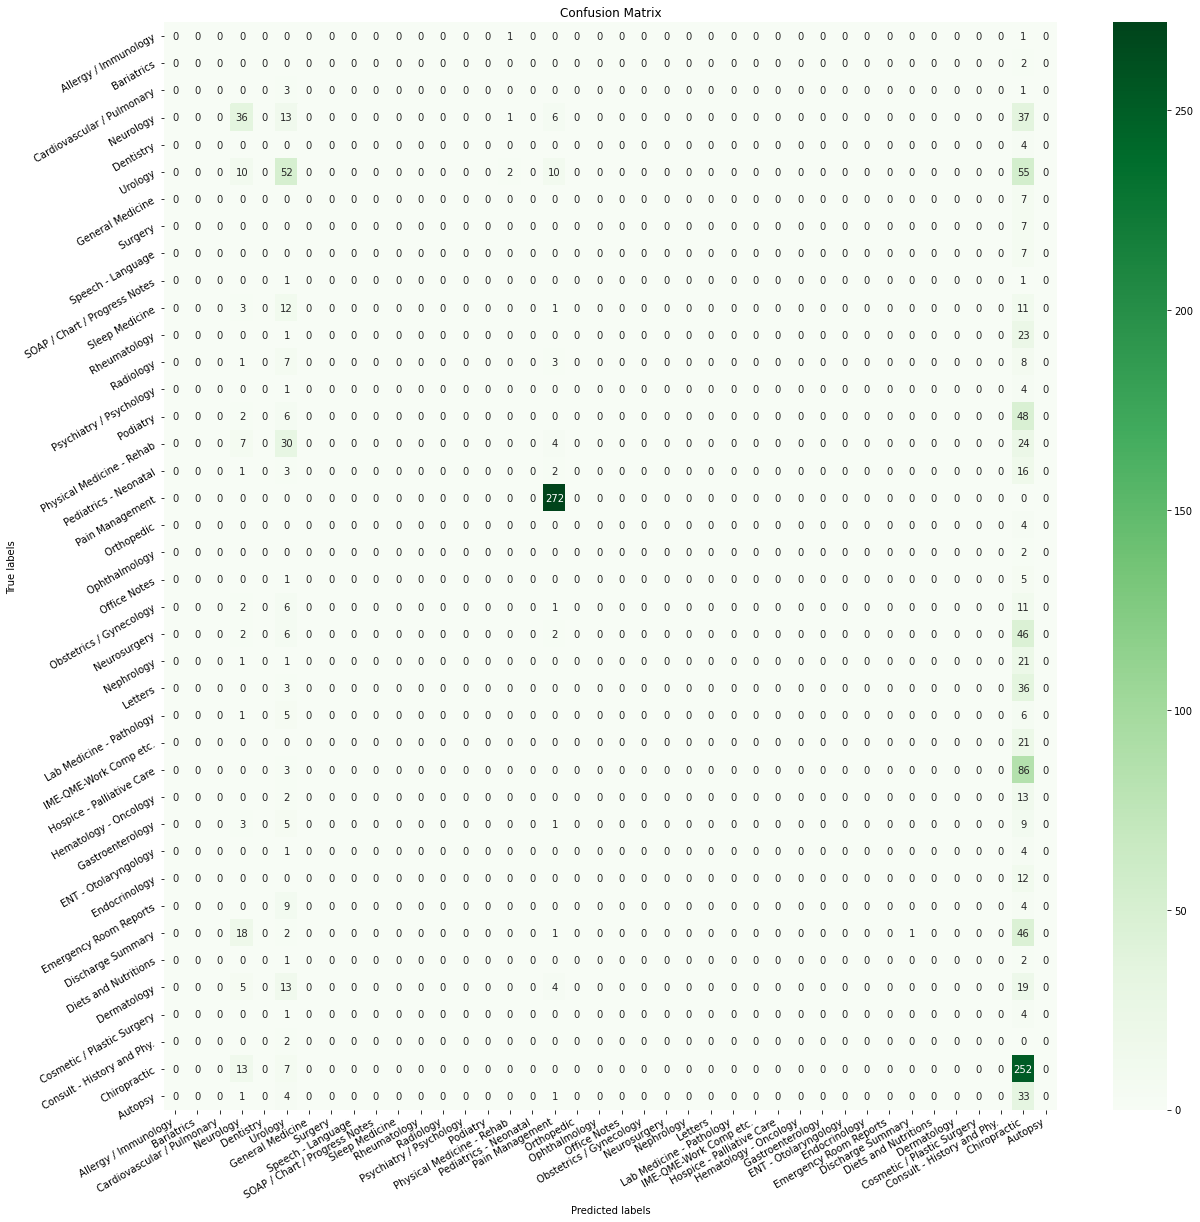

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt



fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()



In [29]:
# from sklearn.metrics import classification_report

# classification_report(y_test,pred,labels=data.medical_specialty.unique())

In [30]:
!pip install xgboost

In [31]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score

# xgb_cl = xgb.XGBClassifier()

In [32]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    param = {
        "n_estimators":trial.suggest_int("n_estimators", 100, 10000),
        "silent": 1,
        "objective": "multi:softmax",
        "eval_metric": "auc",
        "num_class": len(data['medical_specialty'].unique()),
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
    
#     xgb_cl.fit(X_train, y_train)

#     pred= xgb_cl.predict(X_test)
    
#     f1_score(y_test, pred, average='micro')
    
    # Add a callback for pruning.
    bst = xgb.train(param, dtrain)
    pred = bst.predict(dvalid)
    pred_labels = np.rint(pred)
    score = f1_score(y_test, pred_labels, average='micro')
#     accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return score

In [33]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-03 16:20:18,694] A new study created in memory with name: no-name-b4a5498b-efef-4cf6-bf11-9d42ac9e5a5c


[16:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:20:38,257] Trial 0 finished with value: 0.3478835978835979 and parameters: {'n_estimators': 4392, 'booster': 'dart', 'lambda': 0.0026218660060285406, 'alpha': 0.17755444683938, 'max_depth': 5, 'eta': 9.805900509721844e-06, 'gamma': 0.003476761924048504, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0011961693589935861, 'skip_drop': 0.8971372018691817}. Best is trial 0 with value: 0.3478835978835979.


[16:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:21:08,614] Trial 1 finished with value: 0.2810846560846561 and parameters: {'n_estimators': 2429, 'booster': 'dart', 'lambda': 0.7636671527772474, 'alpha': 7.146309349183957e-08, 'max_depth': 9, 'eta': 0.0624179612551807, 'gamma': 3.2611525397506876e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00010784598992746408, 'skip_drop': 0.0019406153724596184}. Best is trial 0 with value: 0.3478835978835979.


[16:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:21:45,409] Trial 2 finished with value: 0.3115079365079365 and parameters: {'n_estimators': 4379, 'booster': 'gbtree', 'lambda': 0.00016116983142672636, 'alpha': 5.572063622889449e-07, 'max_depth': 9, 'eta': 2.76194822260754e-05, 'gamma': 1.0685500282794607e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.3478835978835979.


[16:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:21:46,610] Trial 3 finished with value: 0.1798941798941799 and parameters: {'n_estimators': 3135, 'booster': 'gblinear', 'lambda': 0.020694184702688093, 'alpha': 0.05313992856575968}. Best is trial 0 with value: 0.3478835978835979.


[16:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:22:06,912] Trial 4 finished with value: 0.39285714285714285 and parameters: {'n_estimators': 6181, 'booster': 'dart', 'lambda': 7.239587556547766e-05, 'alpha': 0.00892739597721919, 'max_depth': 4, 'eta': 2.2480218093714088e-08, 'gamma': 6.497469132725624e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.9789743850128649, 'skip_drop': 0.12010278943039863}. Best is trial 4 with value: 0.39285714285714285.


[16:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:22:08,596] Trial 5 finished with value: 0.3505291005291005 and parameters: {'n_estimators': 9251, 'booster': 'gblinear', 'lambda': 0.7410197362196521, 'alpha': 0.0001727160620631625}. Best is trial 4 with value: 0.39285714285714285.


[16:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:22:17,577] Trial 6 finished with value: 0.35846560846560854 and parameters: {'n_estimators': 9338, 'booster': 'dart', 'lambda': 0.006486964770538371, 'alpha': 0.020265562880031587, 'max_depth': 1, 'eta': 1.9253809444432e-06, 'gamma': 0.1160749866374683, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 7.105866319735326e-05, 'skip_drop': 0.024526911308542117}. Best is trial 4 with value: 0.39285714285714285.


[16:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:22:22,834] Trial 7 finished with value: 0.36970899470899476 and parameters: {'n_estimators': 9678, 'booster': 'gbtree', 'lambda': 0.8349643199708342, 'alpha': 0.2845420304966651, 'max_depth': 1, 'eta': 2.0249372067329178e-08, 'gamma': 0.014568224055740308, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 0.39285714285714285.


[16:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:00,512] Trial 8 finished with value: 0.31613756613756616 and parameters: {'n_estimators': 879, 'booster': 'dart', 'lambda': 0.031342701664674566, 'alpha': 6.365757214274604e-05, 'max_depth': 8, 'eta': 2.0448792333288544e-07, 'gamma': 5.2850349325505785e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0068295334708110365, 'skip_drop': 0.0011783978169415765}. Best is trial 4 with value: 0.39285714285714285.


[16:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:02,707] Trial 9 finished with value: 0.4080687830687831 and parameters: {'n_estimators': 7159, 'booster': 'gblinear', 'lambda': 2.5667905431292692e-05, 'alpha': 2.7857384973411782e-05}. Best is trial 9 with value: 0.4080687830687831.


[16:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:05,175] Trial 10 finished with value: 0.3597883597883598 and parameters: {'n_estimators': 7289, 'booster': 'gblinear', 'lambda': 8.025673709555346e-08, 'alpha': 9.757150747706117e-06}. Best is trial 9 with value: 0.4080687830687831.


[16:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:06,342] Trial 11 finished with value: 0.4074074074074074 and parameters: {'n_estimators': 6726, 'booster': 'gblinear', 'lambda': 1.0168413416994037e-06, 'alpha': 0.0021845015570918238}. Best is trial 9 with value: 0.4080687830687831.


[16:23:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:07,735] Trial 12 finished with value: 0.4583333333333333 and parameters: {'n_estimators': 7250, 'booster': 'gblinear', 'lambda': 1.814463101513755e-07, 'alpha': 0.0005102924003405857}. Best is trial 12 with value: 0.4583333333333333.


[16:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:10,303] Trial 13 finished with value: 0.3544973544973545 and parameters: {'n_estimators': 7707, 'booster': 'gblinear', 'lambda': 1.0248514233858036e-08, 'alpha': 4.807099456085031e-06}. Best is trial 12 with value: 0.4583333333333333.


[16:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:11,788] Trial 14 finished with value: 0.46494708994708994 and parameters: {'n_estimators': 5715, 'booster': 'gblinear', 'lambda': 2.7256031470879e-06, 'alpha': 0.0003585174992460033}. Best is trial 14 with value: 0.46494708994708994.


[16:23:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:13,161] Trial 15 finished with value: 0.458994708994709 and parameters: {'n_estimators': 5560, 'booster': 'gblinear', 'lambda': 3.696340907744595e-07, 'alpha': 0.0006523722526855138}. Best is trial 14 with value: 0.46494708994708994.


[16:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:14,406] Trial 16 finished with value: 0.43650793650793657 and parameters: {'n_estimators': 5469, 'booster': 'gblinear', 'lambda': 2.7604501885182e-06, 'alpha': 0.0013974793271048097}. Best is trial 14 with value: 0.46494708994708994.


[16:23:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:29,449] Trial 17 finished with value: 0.4027777777777778 and parameters: {'n_estimators': 3383, 'booster': 'gbtree', 'lambda': 5.966540120969961e-06, 'alpha': 9.426250189912153e-07, 'max_depth': 3, 'eta': 0.010385173869067177, 'gamma': 1.0538133174618147e-08, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:30,710] Trial 18 finished with value: 0.3842592592592593 and parameters: {'n_estimators': 5500, 'booster': 'gblinear', 'lambda': 3.521919772874628e-07, 'alpha': 0.003416933798318213}. Best is trial 14 with value: 0.46494708994708994.


[16:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:23:32,314] Trial 19 finished with value: 0.45436507936507936 and parameters: {'n_estimators': 8199, 'booster': 'gblinear', 'lambda': 3.093861727680548e-08, 'alpha': 0.0002465487181457405}. Best is trial 14 with value: 0.46494708994708994.


[16:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:01,708] Trial 20 finished with value: 0.333994708994709 and parameters: {'n_estimators': 1615, 'booster': 'gbtree', 'lambda': 0.000515750465839128, 'alpha': 0.7928000348437134, 'max_depth': 7, 'eta': 0.0013718872524443313, 'gamma': 9.056903300472315e-07, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:02,996] Trial 21 finished with value: 0.460978835978836 and parameters: {'n_estimators': 6320, 'booster': 'gblinear', 'lambda': 2.3923320894528776e-07, 'alpha': 0.0004848417916993617}. Best is trial 14 with value: 0.46494708994708994.


[16:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:04,262] Trial 22 finished with value: 0.45965608465608465 and parameters: {'n_estimators': 4644, 'booster': 'gblinear', 'lambda': 7.439184267699582e-06, 'alpha': 0.0006519098304324515}. Best is trial 14 with value: 0.46494708994708994.


[16:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:06,155] Trial 23 finished with value: 0.4074074074074074 and parameters: {'n_estimators': 4473, 'booster': 'gblinear', 'lambda': 7.331389219579292e-06, 'alpha': 4.49589714956245e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:07,240] Trial 24 finished with value: 0.35185185185185186 and parameters: {'n_estimators': 6177, 'booster': 'gblinear', 'lambda': 1.4331804560395557e-06, 'alpha': 0.007533237179372849}. Best is trial 14 with value: 0.46494708994708994.


[16:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:09,506] Trial 25 finished with value: 0.3862433862433862 and parameters: {'n_estimators': 3760, 'booster': 'gblinear', 'lambda': 1.2606376948049437e-05, 'alpha': 1.0722827034653243e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:11,221] Trial 26 finished with value: 0.44775132275132273 and parameters: {'n_estimators': 8320, 'booster': 'gblinear', 'lambda': 5.476198532350963e-05, 'alpha': 0.0001195893931973384}. Best is trial 14 with value: 0.46494708994708994.


[16:24:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:12,353] Trial 27 finished with value: 0.4556878306878307 and parameters: {'n_estimators': 6318, 'booster': 'gblinear', 'lambda': 1.4790035378362553e-06, 'alpha': 0.0007717249801060816}. Best is trial 14 with value: 0.46494708994708994.


[16:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:13,509] Trial 28 finished with value: 0.1798941798941799 and parameters: {'n_estimators': 5024, 'booster': 'gblinear', 'lambda': 6.543803975410511e-08, 'alpha': 0.046844477237167746}. Best is trial 14 with value: 0.46494708994708994.


[16:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:37,012] Trial 29 finished with value: 0.25992063492063494 and parameters: {'n_estimators': 4850, 'booster': 'gbtree', 'lambda': 0.0006462710611064024, 'alpha': 2.488249502520631e-08, 'max_depth': 6, 'eta': 0.28142314358929177, 'gamma': 0.5518293576493744, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:55,456] Trial 30 finished with value: 0.4074074074074074 and parameters: {'n_estimators': 3953, 'booster': 'dart', 'lambda': 3.9598754472870956e-07, 'alpha': 1.634725626218578e-06, 'max_depth': 3, 'eta': 0.00034604987464029413, 'gamma': 0.0012308208783703381, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 3.0219713912985967e-07, 'skip_drop': 1.0811785269242431e-08}. Best is trial 14 with value: 0.46494708994708994.


[16:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:56,793] Trial 31 finished with value: 0.46296296296296297 and parameters: {'n_estimators': 5470, 'booster': 'gblinear', 'lambda': 5.701609359428101e-07, 'alpha': 0.0004436692303196706}. Best is trial 14 with value: 0.46494708994708994.


[16:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:58,191] Trial 32 finished with value: 0.458994708994709 and parameters: {'n_estimators': 2693, 'booster': 'gblinear', 'lambda': 1.7924124672015356e-05, 'alpha': 0.00033010852306418264}. Best is trial 14 with value: 0.46494708994708994.


[16:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:24:59,358] Trial 33 finished with value: 0.3578042328042328 and parameters: {'n_estimators': 5832, 'booster': 'gblinear', 'lambda': 3.184228113313104e-06, 'alpha': 0.005924809648617179}. Best is trial 14 with value: 0.46494708994708994.


[16:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:25:00,533] Trial 34 finished with value: 0.42328042328042326 and parameters: {'n_estimators': 4323, 'booster': 'gblinear', 'lambda': 1.3800064442503435e-08, 'alpha': 0.0015913780765112312}. Best is trial 14 with value: 0.46494708994708994.


[16:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:25:02,908] Trial 35 finished with value: 0.3425925925925926 and parameters: {'n_estimators': 6662, 'booster': 'gblinear', 'lambda': 1.0197880921925498e-07, 'alpha': 2.3069380170398839e-07}. Best is trial 14 with value: 0.46494708994708994.


[16:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:25:34,363] Trial 36 finished with value: 0.31812169312169314 and parameters: {'n_estimators': 4965, 'booster': 'dart', 'lambda': 5.383875954868245e-07, 'alpha': 0.00012659401548385297, 'max_depth': 6, 'eta': 0.0030836435981463958, 'gamma': 0.0008455477787145084, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.179873634008907e-08, 'skip_drop': 6.18855235897306e-07}. Best is trial 14 with value: 0.46494708994708994.


[16:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:25:36,557] Trial 37 finished with value: 0.44576719576719576 and parameters: {'n_estimators': 2494, 'booster': 'gblinear', 'lambda': 0.00016995671601326829, 'alpha': 2.9100641298386054e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:25:42,448] Trial 38 finished with value: 0.1746031746031746 and parameters: {'n_estimators': 4538, 'booster': 'gbtree', 'lambda': 3.3039500837672614e-06, 'alpha': 0.026578704015797705, 'max_depth': 2, 'eta': 0.956971411120314, 'gamma': 1.0281352558973633e-08, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:07,711] Trial 39 finished with value: 0.3458994708994709 and parameters: {'n_estimators': 6006, 'booster': 'dart', 'lambda': 3.308105665937916e-05, 'alpha': 0.13708647494791085, 'max_depth': 5, 'eta': 5.475624350400075e-07, 'gamma': 5.809873639432598e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.8879665279063366, 'skip_drop': 9.10401457954601e-06}. Best is trial 14 with value: 0.46494708994708994.


[16:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:08,872] Trial 40 finished with value: 0.3458994708994709 and parameters: {'n_estimators': 3356, 'booster': 'gblinear', 'lambda': 3.0125853967587e-08, 'alpha': 0.016385883231515345}. Best is trial 14 with value: 0.46494708994708994.


[16:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:10,494] Trial 41 finished with value: 0.45634920634920634 and parameters: {'n_estimators': 1954, 'booster': 'gblinear', 'lambda': 1.2400165365472482e-05, 'alpha': 0.0002447138854553336}. Best is trial 14 with value: 0.46494708994708994.


[16:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:11,752] Trial 42 finished with value: 0.45436507936507936 and parameters: {'n_estimators': 5611, 'booster': 'gblinear', 'lambda': 2.3993023515608314e-07, 'alpha': 0.0009588553493209887}. Best is trial 14 with value: 0.46494708994708994.


[16:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:13,279] Trial 43 finished with value: 0.460978835978836 and parameters: {'n_estimators': 2711, 'booster': 'gblinear', 'lambda': 0.00013964603128948267, 'alpha': 0.0003276429002879207}. Best is trial 14 with value: 0.46494708994708994.


[16:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:14,457] Trial 44 finished with value: 0.3869047619047619 and parameters: {'n_estimators': 1556, 'booster': 'gblinear', 'lambda': 0.00016460765824497257, 'alpha': 0.0027550792985160965}. Best is trial 14 with value: 0.46494708994708994.


[16:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:16,318] Trial 45 finished with value: 0.45171957671957674 and parameters: {'n_estimators': 6717, 'booster': 'gblinear', 'lambda': 0.0008168408123694373, 'alpha': 5.904339669827144e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:18,441] Trial 46 finished with value: 0.36507936507936506 and parameters: {'n_estimators': 3945, 'booster': 'gblinear', 'lambda': 8.798947834732931e-07, 'alpha': 1.2223720600350413e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:51,942] Trial 47 finished with value: 0.31812169312169314 and parameters: {'n_estimators': 2864, 'booster': 'dart', 'lambda': 0.0037325069184799284, 'alpha': 0.00043498648346196165, 'max_depth': 7, 'eta': 0.00013558598727229294, 'gamma': 0.034476319121372334, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.042203853844173e-06, 'skip_drop': 1.761870917326768e-08}. Best is trial 14 with value: 0.46494708994708994.


[16:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:53,665] Trial 48 finished with value: 0.3538359788359789 and parameters: {'n_estimators': 320, 'booster': 'gblinear', 'lambda': 0.026919714157642504, 'alpha': 9.783267977157354e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:26:54,874] Trial 49 finished with value: 0.35846560846560854 and parameters: {'n_estimators': 5238, 'booster': 'gblinear', 'lambda': 7.633004592630248e-05, 'alpha': 0.0056507301158675504}. Best is trial 14 with value: 0.46494708994708994.


[16:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:09,230] Trial 50 finished with value: 0.4027777777777778 and parameters: {'n_estimators': 7640, 'booster': 'gbtree', 'lambda': 7.645520828079309e-06, 'alpha': 0.0013398947587504584, 'max_depth': 3, 'eta': 0.01901510843489488, 'gamma': 0.6576312738639124, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:10,602] Trial 51 finished with value: 0.35119047619047616 and parameters: {'n_estimators': 5671, 'booster': 'gblinear', 'lambda': 0.1553850977378315, 'alpha': 0.000602843594658907}. Best is trial 14 with value: 0.46494708994708994.


[16:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:12,163] Trial 52 finished with value: 0.4583333333333333 and parameters: {'n_estimators': 2244, 'booster': 'gblinear', 'lambda': 4.8031701927750267e-05, 'alpha': 0.000199512009367097}. Best is trial 14 with value: 0.46494708994708994.


[16:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:13,630] Trial 53 finished with value: 0.46164021164021163 and parameters: {'n_estimators': 2844, 'booster': 'gblinear', 'lambda': 2.8459639487750747e-05, 'alpha': 0.00038378576736056825}. Best is trial 14 with value: 0.46494708994708994.


[16:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:14,848] Trial 54 finished with value: 0.3816137566137566 and parameters: {'n_estimators': 1239, 'booster': 'gblinear', 'lambda': 0.000310400768181643, 'alpha': 0.0028048520488384897}. Best is trial 14 with value: 0.46494708994708994.


[16:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:17,054] Trial 55 finished with value: 0.3842592592592593 and parameters: {'n_estimators': 3172, 'booster': 'gblinear', 'lambda': 1.5794603393178632e-06, 'alpha': 2.5495553393573363e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:18,984] Trial 56 finished with value: 0.42394179894179895 and parameters: {'n_estimators': 3684, 'booster': 'gblinear', 'lambda': 4.602761381087966e-06, 'alpha': 8.252702063900291e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:27:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:20,369] Trial 57 finished with value: 0.42063492063492064 and parameters: {'n_estimators': 6380, 'booster': 'gblinear', 'lambda': 0.0012830666145101097, 'alpha': 0.00036791512850822947}. Best is trial 14 with value: 0.46494708994708994.


[16:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:21,554] Trial 58 finished with value: 0.3472222222222222 and parameters: {'n_estimators': 4675, 'booster': 'gblinear', 'lambda': 2.6148347649101958e-05, 'alpha': 0.013059843387333958}. Best is trial 14 with value: 0.46494708994708994.


[16:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:22,733] Trial 59 finished with value: 0.44907407407407407 and parameters: {'n_estimators': 7001, 'booster': 'gblinear', 'lambda': 8.247445492920316e-07, 'alpha': 0.0011289188478410738}. Best is trial 14 with value: 0.46494708994708994.


[16:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:41,084] Trial 60 finished with value: 0.37037037037037035 and parameters: {'n_estimators': 4301, 'booster': 'gbtree', 'lambda': 1.8548667155407842e-06, 'alpha': 3.5559114809262333e-06, 'max_depth': 4, 'eta': 5.539527837815075e-06, 'gamma': 6.711906895702352e-06, 'grow_policy': 'depthwise'}. Best is trial 14 with value: 0.46494708994708994.


[16:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:42,610] Trial 61 finished with value: 0.4576719576719577 and parameters: {'n_estimators': 2897, 'booster': 'gblinear', 'lambda': 1.1236148907591914e-05, 'alpha': 0.0002817855040825302}. Best is trial 14 with value: 0.46494708994708994.


[16:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:44,317] Trial 62 finished with value: 0.44907407407407407 and parameters: {'n_estimators': 1981, 'booster': 'gblinear', 'lambda': 1.4752250022999312e-05, 'alpha': 0.00016392759475081215}. Best is trial 14 with value: 0.46494708994708994.


[16:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:45,641] Trial 63 finished with value: 0.45634920634920634 and parameters: {'n_estimators': 5945, 'booster': 'gblinear', 'lambda': 1.5798999571501525e-07, 'alpha': 0.0007504258446138297}. Best is trial 14 with value: 0.46494708994708994.


[16:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:47,142] Trial 64 finished with value: 0.460978835978836 and parameters: {'n_estimators': 2624, 'booster': 'gblinear', 'lambda': 9.6913365727387e-05, 'alpha': 0.0003545327828684248}. Best is trial 14 with value: 0.46494708994708994.


[16:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:49,375] Trial 65 finished with value: 0.43783068783068785 and parameters: {'n_estimators': 5180, 'booster': 'gblinear', 'lambda': 9.164359844950609e-05, 'alpha': 3.441204444775101e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:27:50,596] Trial 66 finished with value: 0.39285714285714285 and parameters: {'n_estimators': 1025, 'booster': 'gblinear', 'lambda': 0.0001817872466356391, 'alpha': 0.002329842256572554}. Best is trial 14 with value: 0.46494708994708994.


[16:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:26,811] Trial 67 finished with value: 0.3148148148148148 and parameters: {'n_estimators': 3613, 'booster': 'dart', 'lambda': 3.979314194599579e-05, 'alpha': 0.004665807303601658, 'max_depth': 8, 'eta': 1.366237618444655e-07, 'gamma': 0.0003149478688924077, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.0897931885057784e-08, 'skip_drop': 1.9160487013774038e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:28,215] Trial 68 finished with value: 0.4642857142857143 and parameters: {'n_estimators': 2374, 'booster': 'gblinear', 'lambda': 0.0002828927502780496, 'alpha': 0.0005007171784119573}. Best is trial 14 with value: 0.46494708994708994.


[16:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:30,244] Trial 69 finished with value: 0.3551587301587302 and parameters: {'n_estimators': 2397, 'booster': 'gblinear', 'lambda': 0.012008677263028166, 'alpha': 6.584594372519804e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:31,854] Trial 70 finished with value: 0.4523809523809524 and parameters: {'n_estimators': 1839, 'booster': 'gblinear', 'lambda': 0.00028442569052987464, 'alpha': 0.00016042916502628484}. Best is trial 14 with value: 0.46494708994708994.


[16:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:32,889] Trial 71 finished with value: 0.4226190476190476 and parameters: {'n_estimators': 2207, 'booster': 'gblinear', 'lambda': 5.738156343593118e-07, 'alpha': 0.0016489940437789334}. Best is trial 14 with value: 0.46494708994708994.


[16:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:34,091] Trial 72 finished with value: 0.460978835978836 and parameters: {'n_estimators': 3064, 'booster': 'gblinear', 'lambda': 0.00011826944585105978, 'alpha': 0.0004497177254126299}. Best is trial 14 with value: 0.46494708994708994.


[16:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:35,242] Trial 73 finished with value: 0.39814814814814814 and parameters: {'n_estimators': 2649, 'booster': 'gblinear', 'lambda': 0.0021239637958150874, 'alpha': 0.00044585816156854455}. Best is trial 14 with value: 0.46494708994708994.


[16:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:37,528] Trial 74 finished with value: 0.43915343915343913 and parameters: {'n_estimators': 3058, 'booster': 'gblinear', 'lambda': 0.00035826114296996423, 'alpha': 1.8541526814829124e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:38,842] Trial 75 finished with value: 0.4603174603174603 and parameters: {'n_estimators': 1457, 'booster': 'gblinear', 'lambda': 6.602688063197367e-05, 'alpha': 0.0002991715318402173}. Best is trial 14 with value: 0.46494708994708994.


[16:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:40,163] Trial 76 finished with value: 0.4126984126984127 and parameters: {'n_estimators': 3275, 'booster': 'gblinear', 'lambda': 0.000994584093958686, 'alpha': 0.0008294959589275479}. Best is trial 14 with value: 0.46494708994708994.


[16:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:48,905] Trial 77 finished with value: 0.419973544973545 and parameters: {'n_estimators': 3999, 'booster': 'gbtree', 'lambda': 0.00014518465615921287, 'alpha': 0.00013000486048957727, 'max_depth': 2, 'eta': 5.8132367724142394e-05, 'gamma': 2.779215524974993e-07, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:50,725] Trial 78 finished with value: 0.4451058201058201 and parameters: {'n_estimators': 576, 'booster': 'gblinear', 'lambda': 0.0005733269138829784, 'alpha': 5.095453967603471e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:28:51,889] Trial 79 finished with value: 0.4603174603174603 and parameters: {'n_estimators': 6491, 'booster': 'gblinear', 'lambda': 0.0001219359122291919, 'alpha': 0.0005356015804806473}. Best is trial 14 with value: 0.46494708994708994.


[16:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:21,096] Trial 80 finished with value: 0.31216931216931215 and parameters: {'n_estimators': 5367, 'booster': 'dart', 'lambda': 5.719826126649542e-08, 'alpha': 0.00021284101447988966, 'max_depth': 7, 'eta': 0.0006034267210684825, 'gamma': 9.986559038235541e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.029695543037199294, 'skip_drop': 5.198455193269837e-07}. Best is trial 14 with value: 0.46494708994708994.


[16:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:22,404] Trial 81 finished with value: 0.4603174603174603 and parameters: {'n_estimators': 1580, 'booster': 'gblinear', 'lambda': 7.932583590325394e-05, 'alpha': 0.00033921806903052524}. Best is trial 14 with value: 0.46494708994708994.


[16:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:23,549] Trial 82 finished with value: 0.41931216931216925 and parameters: {'n_estimators': 1136, 'booster': 'gblinear', 'lambda': 5.12878997985398e-05, 'alpha': 0.0017665105804832877}. Best is trial 14 with value: 0.46494708994708994.


[16:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:24,758] Trial 83 finished with value: 0.44907407407407407 and parameters: {'n_estimators': 1663, 'booster': 'gblinear', 'lambda': 2.5336815269764722e-05, 'alpha': 0.0010994576485216473}. Best is trial 14 with value: 0.46494708994708994.


[16:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:26,318] Trial 84 finished with value: 0.4437830687830688 and parameters: {'n_estimators': 2237, 'booster': 'gblinear', 'lambda': 0.00023883270275068124, 'alpha': 9.262583563727195e-05}. Best is trial 14 with value: 0.46494708994708994.


[16:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:27,372] Trial 85 finished with value: 0.375 and parameters: {'n_estimators': 2644, 'booster': 'gblinear', 'lambda': 0.0001056093959637866, 'alpha': 0.0039021727633417993}. Best is trial 14 with value: 0.46494708994708994.


[16:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:28,562] Trial 86 finished with value: 0.45105820105820105 and parameters: {'n_estimators': 6486, 'booster': 'gblinear', 'lambda': 0.0004070528739274337, 'alpha': 0.000565607301824738}. Best is trial 14 with value: 0.46494708994708994.


[16:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:29,768] Trial 87 finished with value: 0.46296296296296297 and parameters: {'n_estimators': 2066, 'booster': 'gblinear', 'lambda': 2.5201635999786747e-07, 'alpha': 0.00034686768243600554}. Best is trial 14 with value: 0.46494708994708994.


[16:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:31,065] Trial 88 finished with value: 0.4523809523809524 and parameters: {'n_estimators': 3476, 'booster': 'gblinear', 'lambda': 2.8810884543156995e-07, 'alpha': 0.00021299663169791361}. Best is trial 14 with value: 0.46494708994708994.


[16:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:32,180] Trial 89 finished with value: 0.4537037037037037 and parameters: {'n_estimators': 2806, 'booster': 'gblinear', 'lambda': 1.3246326100878424e-07, 'alpha': 0.0009143429804235398}. Best is trial 14 with value: 0.46494708994708994.


[16:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:33,215] Trial 90 finished with value: 0.35185185185185186 and parameters: {'n_estimators': 3073, 'booster': 'gblinear', 'lambda': 5.270726984101242e-07, 'alpha': 0.008247991067923227}. Best is trial 14 with value: 0.46494708994708994.


[16:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:34,402] Trial 91 finished with value: 0.458994708994709 and parameters: {'n_estimators': 2076, 'booster': 'gblinear', 'lambda': 2.5028188779574548e-05, 'alpha': 0.0003693757853650534}. Best is trial 14 with value: 0.46494708994708994.


[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:35,880] Trial 92 finished with value: 0.43584656084656087 and parameters: {'n_estimators': 1836, 'booster': 'gblinear', 'lambda': 4.6575424614700705e-08, 'alpha': 0.00011392519067386455}. Best is trial 14 with value: 0.46494708994708994.


[16:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:37,029] Trial 93 finished with value: 0.460978835978836 and parameters: {'n_estimators': 5777, 'booster': 'gblinear', 'lambda': 2.2190340348782648e-07, 'alpha': 0.0005033562960172149}. Best is trial 14 with value: 0.46494708994708994.


[16:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:38,214] Trial 94 finished with value: 0.458994708994709 and parameters: {'n_estimators': 5763, 'booster': 'gblinear', 'lambda': 2.1727769720589154e-07, 'alpha': 0.0005396968793835583}. Best is trial 14 with value: 0.46494708994708994.


[16:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:39,276] Trial 95 finished with value: 0.42460317460317465 and parameters: {'n_estimators': 2527, 'booster': 'gblinear', 'lambda': 2.251798284398793e-06, 'alpha': 0.0015710543464579237}. Best is trial 14 with value: 0.46494708994708994.


[16:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:29:59,773] Trial 96 finished with value: 0.2619047619047619 and parameters: {'n_estimators': 6087, 'booster': 'gbtree', 'lambda': 1.078785432941085e-07, 'alpha': 0.00016080637206490497, 'max_depth': 6, 'eta': 0.23527873069609048, 'gamma': 6.187049125705596e-08, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.46494708994708994.


[16:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:30:01,039] Trial 97 finished with value: 0.45701058201058203 and parameters: {'n_estimators': 4761, 'booster': 'gblinear', 'lambda': 1.2286311621339614e-06, 'alpha': 0.00026638434630889886}. Best is trial 14 with value: 0.46494708994708994.


[16:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:30:02,179] Trial 98 finished with value: 0.4556878306878307 and parameters: {'n_estimators': 7053, 'booster': 'gblinear', 'lambda': 2.0407413900417627e-08, 'alpha': 0.0007838521412128375}. Best is trial 14 with value: 0.46494708994708994.


[16:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-03 16:30:22,361] Trial 99 finished with value: 0.3716931216931217 and parameters: {'n_estimators': 5348, 'booster': 'dart', 'lambda': 3.7238537331966215e-07, 'alpha': 0.002409704391817138, 'max_depth': 4, 'eta': 1.1754370246129857e-06, 'gamma': 0.007112694277873232, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.418074598064315e-06, 'skip_drop': 0.0014439647559109355}. Best is trial 14 with value: 0.46494708994708994.


Number of finished trials:  100
Best trial:
  Value: 0.46494708994708994
  Params: 
    n_estimators: 5715
    booster: gblinear
    lambda: 2.7256031470879e-06
    alpha: 0.0003585174992460033


In [34]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
bst = xgb.train({"booster": "gblinear",
                 "silent": 1,
        "objective": "multi:softmax",
        "eval_metric": "auc",
        "num_class": len(data['medical_specialty'].unique()),
    "lambda": 1.4191805480381518e-05,
    "alpha": 0.0009355928847260705}, dtrain)
pred = bst.predict(dvalid)
pred_labels = np.rint(pred)
score = f1_score(y_test, pred_labels, average='micro')
score

[16:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.455026455026455

In [35]:
from sklearn.metrics import confusion_matrix

labels = data['medical_specialty'].unique()
cm = confusion_matrix(y_test, pred)

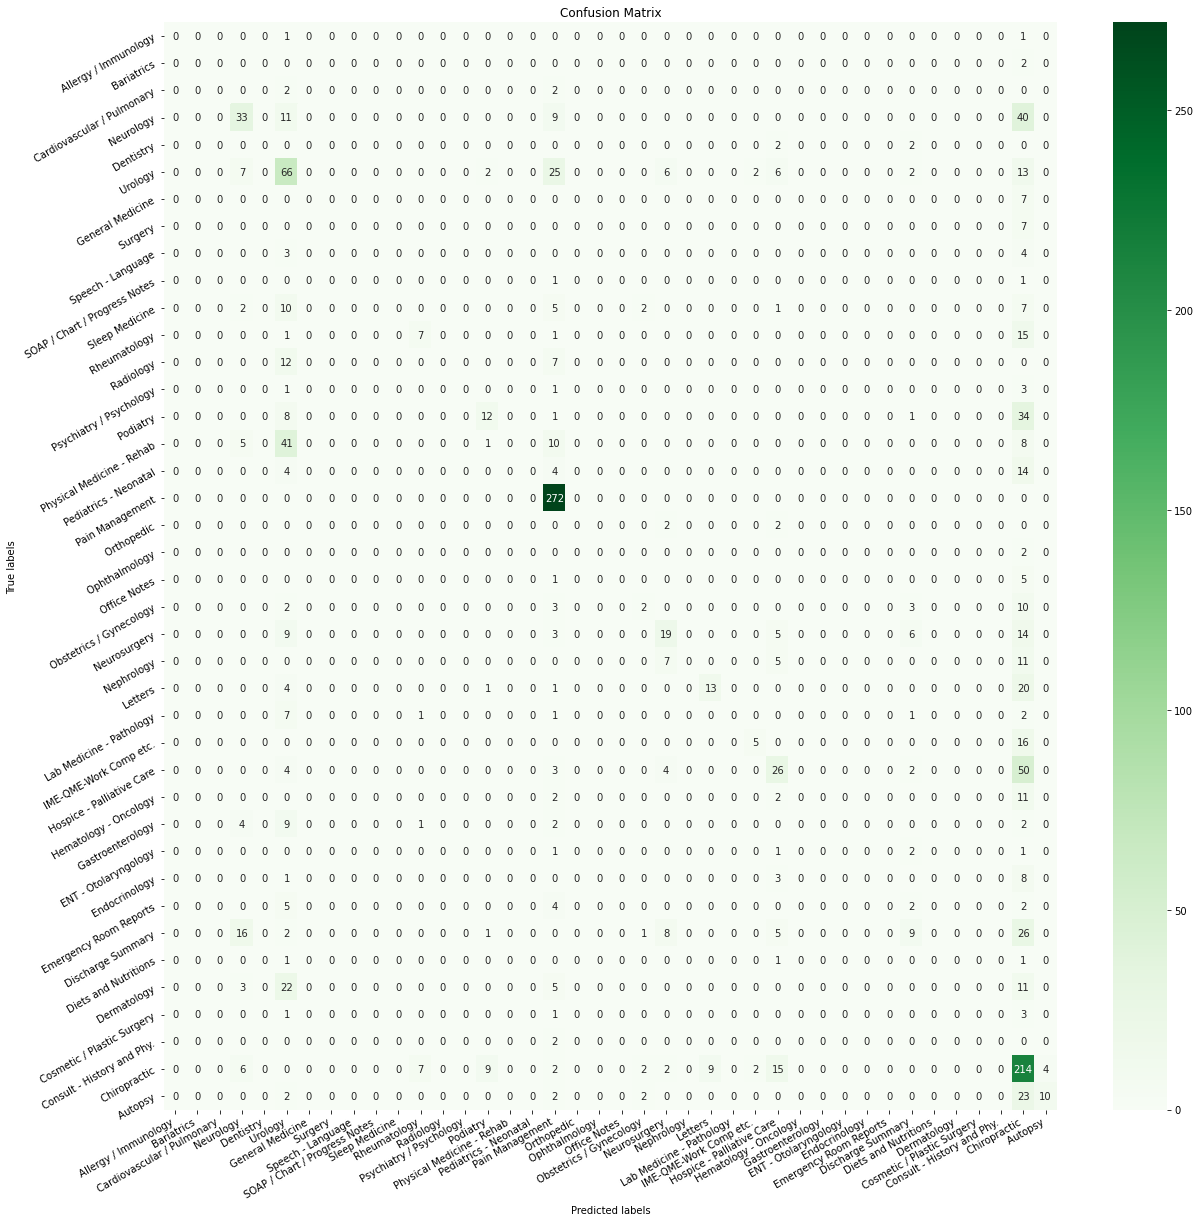

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt



fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

Conclusion : Some categories are predicted well but minority classes are not predicted well. After droping minority classes, results are going to improve signification. I have commented the code to drop minority classes but it can be uncommented and threshold can be provided according to the buisness needs.